#**Loading MNIST Data**

In [ ]:
from keras.datasets import mnist
import time

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


#**Plotting data** 

In [1]:
import matplotlib.pyplot as plt

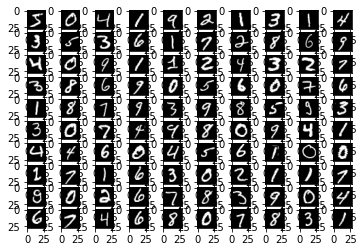

In [ ]:
figure, axis = plt.subplots(10,10)
for i in range(10):
  for j in range(10):  
    axis[i,j].imshow(train_X[i*10+j], cmap=plt.get_cmap('gray'))
    #pyplot.show()
    #print(train_y[i])

#**Flattening images to form training and testing data**

In [ ]:
train_X = train_X.reshape((train_X.shape[0],train_X.shape[1]*train_X.shape[2]))

In [ ]:
test_X = test_X.reshape((test_X.shape[0],test_X.shape[1]*test_X.shape[2]))

In [ ]:
print(train_X.shape)
print(test_X.shape)

(60000, 784)
(10000, 784)


#**Classifier trained on original data**

In [ ]:
from sklearn import svm
clf_full_data = svm.SVC()
clf_full_data.fit(train_X, train_y)

In [ ]:
print("Training Accuracy:",clf_full_data.score(train_X,train_y))
print("Testing Accuracy:",clf_full_data.score(test_X,test_y))

#test_pred = clf_full_data.predict(test_X)
#print("Testing Accuracy:",metrics.accuracy_score(test_y, test_pred))

Training Accuracy: 0.9899166666666667
Testing Accuracy: 0.9792


#**Classifier trained on data projeted with PCA**

##**Dimesionality reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA
import time
pca = PCA(n_components = 0.95)
start = time.time()
train_X_pca = pca.fit_transform(train_X)
end = time.time()

print(end - start)

12.92643141746521


In [ ]:
#reducing dimension of test data
test_X_pca = pca.transform(test_X)

In [ ]:
train_X_pca.shape

(60000, 154)

## **training classifier**

In [ ]:
clf_pca = svm.SVC()
clf_pca.fit(train_X_pca, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training Accuracy:",clf_pca.score(train_X_pca,train_y))
print("Testing Accuracy:",clf_pca.score(test_X_pca,test_y))

Training Accuracy: 0.9934
Testing Accuracy: 0.9832


#**Classifier trained on data projeted with Random Projection**

##**Dimesionality reduction using Random projection**

In [ ]:
from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(eps = 0.9)
start = time.time()
train_X_random = transformer.fit_transform(train_X)
end = time.time()

end - start

1.0356073379516602

In [ ]:
#reducing dimension of test data
test_X_random = transformer.transform(test_X)

In [ ]:
train_X_random.shape

(60000, 271)

## **Training classifier**

In [ ]:
clf_rp = svm.SVC()
clf_rp.fit(train_X_random, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training Accuracy:",clf_rp.score(train_X_random,train_y))
print("Testing Accuracy:",clf_rp.score(test_X_random,test_y))

Training Accuracy: 0.9860166666666667
Testing Accuracy: 0.9761


#**Classifier trained on data projeted with LLE**

##**Dimesionality reduction using Manifold LLE**

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=154)
start = time.time()
train_X_LLE = embedding.fit_transform(train_X)
end = time.time()

end - start

In [ ]:
test_X_LLE = embedding.transform(test_X)

## **Training classifier**

In [ ]:
clf_LLE = svm.SVC()
clf_LLE.fit(train_X_LLE, train_y)

In [ ]:
print("Training Accuracy:",clf_LLE.score(train_X_LLE,train_y))
print("Testing Accuracy:",clf_LLE.score(test_X_LLE,test_y))

#**Classifier trained on data projeted with t-SNE**

##**Dimesionality reduction using Manifold t-SNE**

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 154, random_state = 42)
t0 = time.time()
train_X_tsne = tsne.fit_transform(train_X)
t1 = time.time()

print(t1-t0)

In [ ]:
test_X_tsne = tsne.fit(test_X)

## **Training classifier**

In [ ]:
clf_tsne = svm.SVC()
clf_tsne.fit(train_X_tsne, train_y)

In [ ]:
print("Training Accuracy:",clf_LLE.score(train_X_tsne,train_y))
print("Testing Accuracy:",clf_LLE.score(test_X_tsne,test_y))

# **Visualization of projected data**

**Comparying the quality of all the techniques by projecting data to 2-D space and visualising it.**

1. We will use PCA to reduce the dataset down to 2 Dimensional space and then plot it.

2.   We will use TSNE to reduce the datset down to 2 Dimensional space and then plot it.



2.8741018772125244


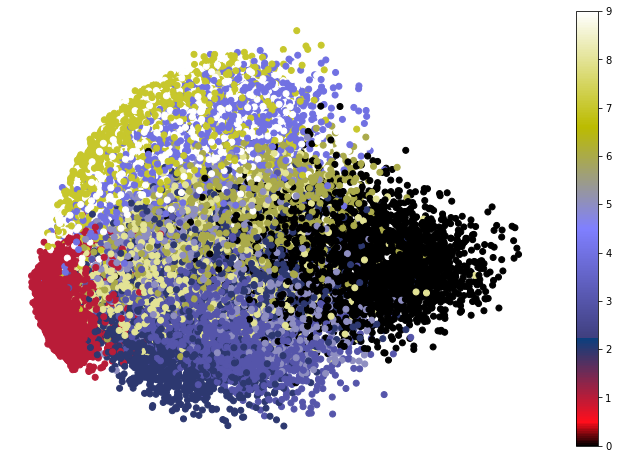

In [ ]:
#PCA
pca = PCA(n_components = 2)
t0 = time.time()
X_pca = pca.fit_transform(train_X)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c = train_y, cmap='gist_stern')
plt.colorbar()
plt.axis('off')
plt.show()

4432.939642906189


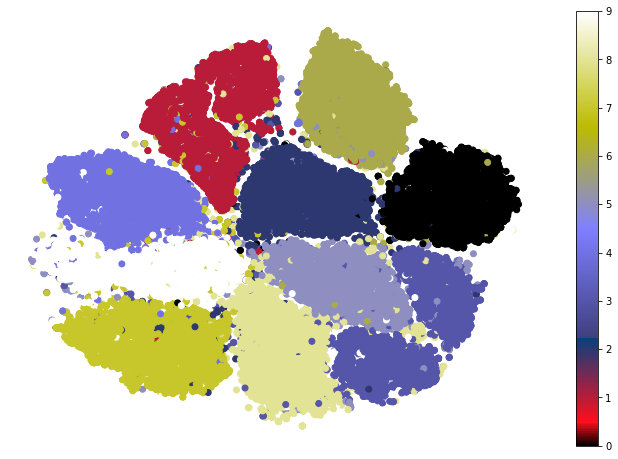

In [ ]:
#t-SNE
tsne = TSNE(n_components = 2, random_state = 42)
t0 = time.time()
X_tsne = tsne.fit_transform(train_X)
t1 = time.time()

print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = train_y, cmap='gist_stern')
plt.colorbar()
plt.axis('off')
plt.show()